In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

Reading the cleaned datasets for exploration

In [31]:
ames_df = pd.read_csv('../datasets/ames_df_cleaned.csv')

In [32]:
ames_test = pd.read_csv('../datasets/ames_test_cleaned.csv')

### 3.5: Checking Correlations between predictors and removing highly correlated predictors

Let's draw a heatmap to check for correlation between predictors

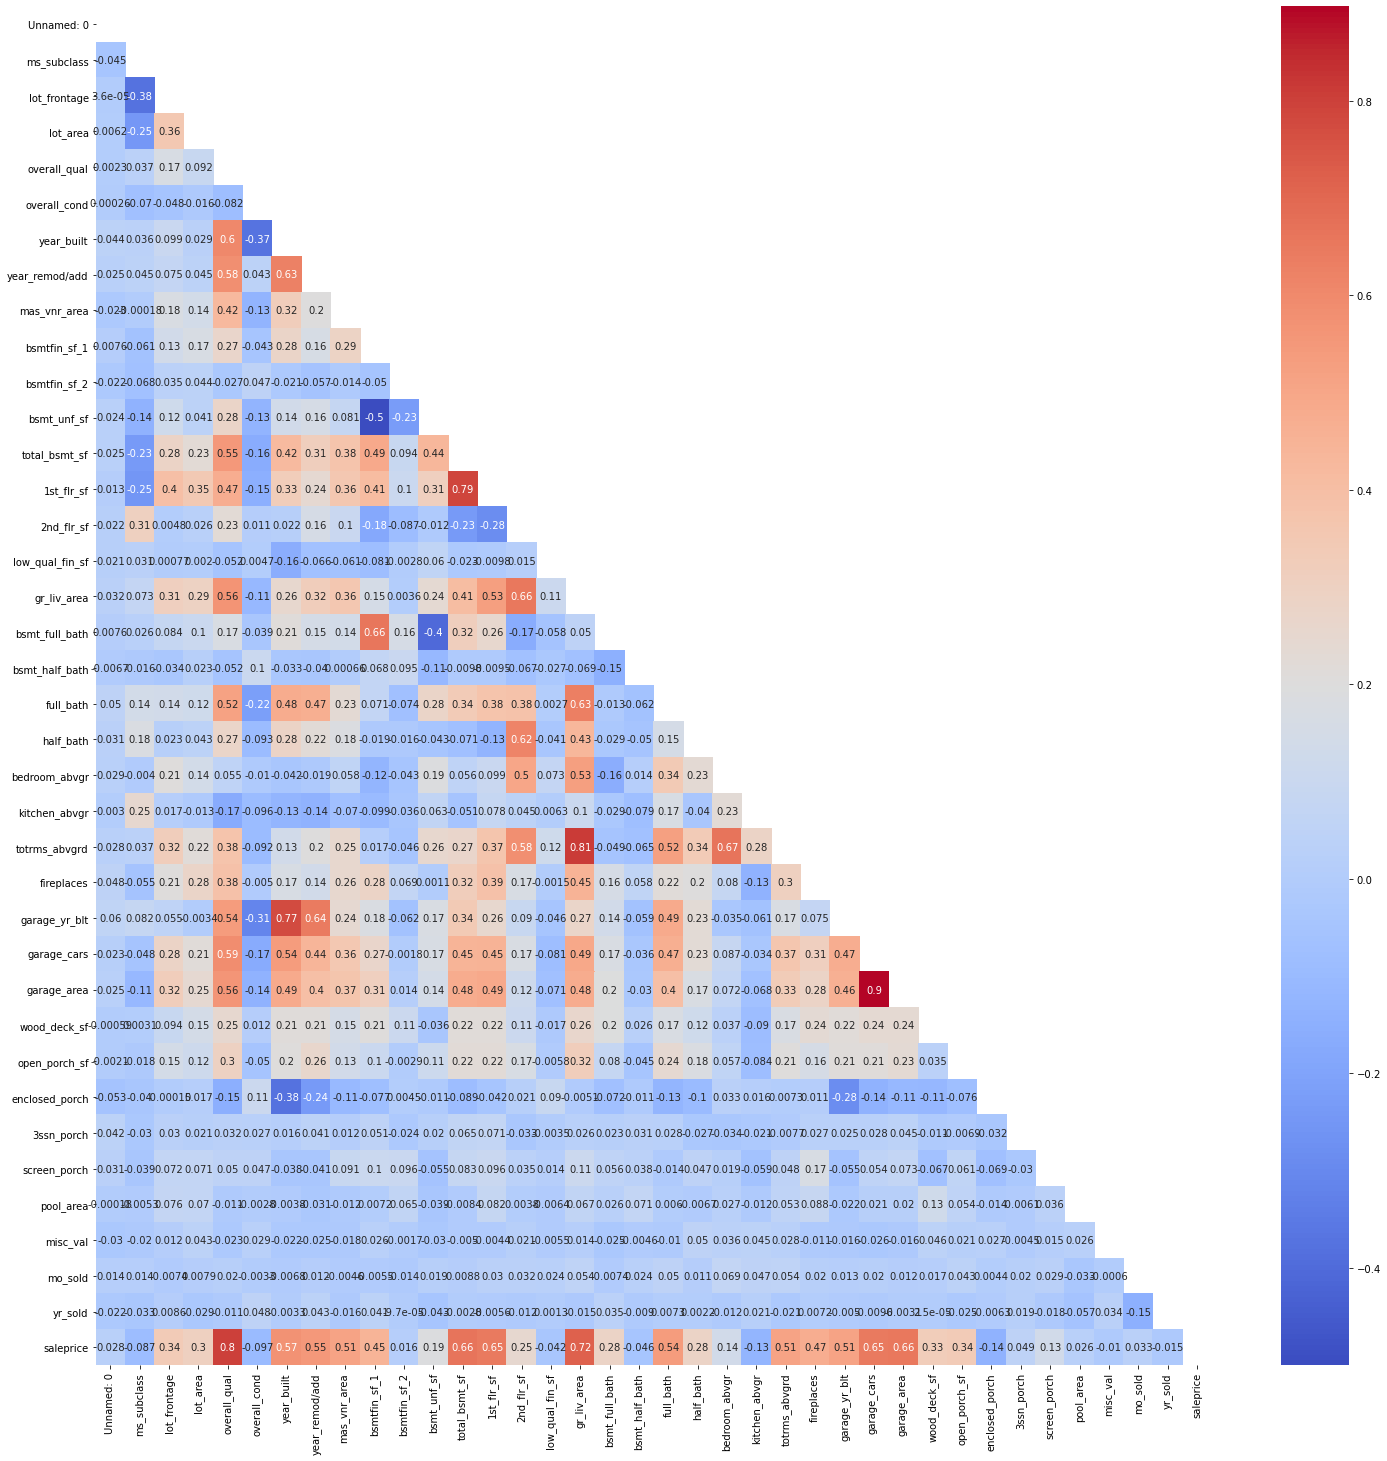

In [33]:
#Draw a mask to hide the upper triangle of the heatmap
mask = np.zeros_like(ames_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Plotting the heatmap with annotations
plt.figure(figsize=(25, 25))
sns.heatmap(ames_df.corr(), mask=mask, annot=True, cmap='coolwarm');

#### Correlations between response variable and predictor variables

The last row of the heatmap shows the correlations between the predictor variables and the response variable, saleprice.

The following variables are highly positively correlated (>0.75) with saleprice.

|**Index**|**Highly Positively Correlated Variable**|**Correlation**|
|---|---|---|
|1|overall_qual|0.8|

The following variables are positively correlated (>0.50) with saleprice.

|**Index**|**Positively Correlated Variable**|**Correlation**|
|---|---|---|
|1|year_built|0.57|
|2|year_remod/add|0.55|
|3|mas_vnr_area|0.51|
|4|total_bsmt_sf|0.66|
|5|1st_flr_sf|0.65|
|6|gr_liv_area|0.72|
|7|full_bath|0.54|
|8|totrms_abvgrd|0.51|
|9|garage_yr_blt|0.51|
|10|garage_cars|0.65|
|11|garage_area|0.66|

There do not seem to be negatively correlated variables with the response variable.

#### Correlations between predictor variables

These variables have >0.75 correlation between them

|**Index**|**Variable 1**|**Variable 2**|
|---|---|---|
|1|garage_yr_blt|year_built|
|2|totrms_abvgrd|gr_liv_area|
|3|garage_area|garage_cars|
|4|1st_flr_sf|total_bsmt_sf|

## Section 4: Exploratory Data Analysis

Having resolved the null values in the variables, it's now time to explore the data. This section will first visualise the response variable, before moving on to explore correlations between the predictor and the response variable. Finally, I explore the correlation between predictors. 

### 4.1: Visualising the response variable

The most important visualisation is for the response variable, in this case, 'saleprice'. This is because it tells us the distribution of the response and allows us to check if assumptions for modelling are met. It also gives us a lower bound on how well we expect our models to perform. This is because the distribution tells us about the variation in the response, meaning that any models we make should have residuals that have less variation than the variation in the response.

According to [Kuhn and Johnson](https://bookdown.org/max/FES/visualizations-for-numeric-data-exploring-train-ridership-data.html), A violin plot combines the benefits of both a histogram and a boxplot. Like a histogram, it gives a clear shape to the distribution from which the variable sample was drawn from. Like a boxplot, one can choose to see the quartile ranges and the median value.

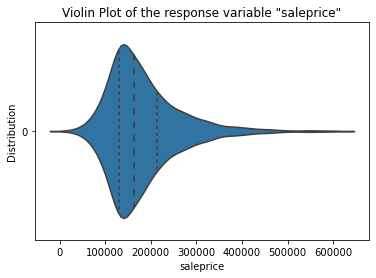

In [34]:
sns.violinplot(data=ames_df['saleprice'], orient='h', inner='quartile');
plt.title('Violin Plot of the response variable "saleprice"');
plt.xlabel('saleprice');
plt.ylabel('Distribution');

According to the violin plot, there is a normal distribution underlying the response variable. Most houses are sold for between 120,000 - 250,000. The median is around 180,000. The distribution is skewed to the right, showing how house prices can get more and more expensive. House prices also cannot go below 0, a negative price does not make sense. 

Now, for linear regression, we assume that the _errors_ are normally distributed, _not_ the variable itself. However, transforming the variable may help normalise the errors. It will also turn heteroskedacitic variance homoskedactic. While I will leave this variable as it is, a viable alternative is using boxcox to transform the variable

### 4.2: Visualising saleprice and highly correlated variables

Below are the variables postively correlated with saleprice

The following variables are highly positively correlated (>0.75) with saleprice.

|**Index**|**Highly Positively Correlated Variable**|**Correlation**|
|---|---|---|
|1|overall_qual|0.8|

The following variables are positively correlated (>0.50) with saleprice.

|**Index**|**Positively Correlated Variable**|**Correlation**|
|---|---|---|
|1|year_built|0.57|
|2|year_remod/add|0.55|
|3|mas_vnr_area|0.51|
|4|total_bsmt_sf|0.66|
|5|1st_flr_sf|0.65|
|6|gr_liv_area|0.72|
|7|full_bath|0.54|
|8|totrms_abvgrd|0.51|
|9|garage_yr_blt|0.51|
|10|garage_cars|0.65|
|11|garage_area|0.66|

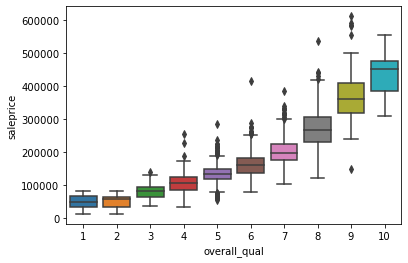

In [35]:
#Visualising Highly Positively Correlated Variable 'overall_qual'
sns.boxplot(x=ames_df['overall_qual'], y=ames_df['saleprice']);

The prices increase as overall house quality increases. However, the variation gets larger as overall_qual increases. Variation is at its highest at '8', which indicates a house with 'very good' material and finish.

In [36]:
def distribution_plotter(column_names):
    """
    Input: A list of column names
    Output: NA
    
    While there is no return value, this function plots len(column_names) histograms, 
    1 for each column name in ames_df, using Seaborn. This allows us to plot histograms when needed
    """ 
    #Instantiate subplots
    fig,ax = plt.subplots(len(column_names),1, figsize=(7,10), tight_layout=True)
    
    #Plot a scatterplot for each graph by enumerating the column_names and using the index as axes indexes.
    for index, column_name in enumerate(column_names):
        sns.histplot(ames_df[column_name], ax=ax[index]);

def correlation_plotter(column_names):
    """
    Input: A list of column names
    Output: NA
    
    While there is no return value, this function plots len(column_names) scatterplots, 
    1 for each column name in ames_df, against 'saleprice'. This function uses Seaborn.
    """
    #Instantiate subplots
    fig,ax = plt.subplots(len(column_names),1, figsize=(7,10), tight_layout=True)
    
    #Plot a scatterplot for each graph by enumerating the column_names and using the index as axes indexes.
    for index, column_name in enumerate(column_names):
        sns.scatterplot(x=ames_df[column_name], y=ames_df['saleprice'], ax=ax[index]);

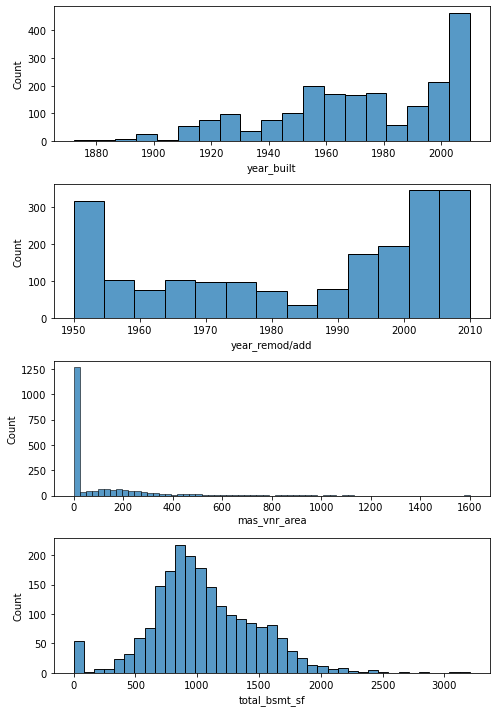

In [37]:
distribution_plotter(['year_built', 'year_remod/add', 'mas_vnr_area', 'total_bsmt_sf'])

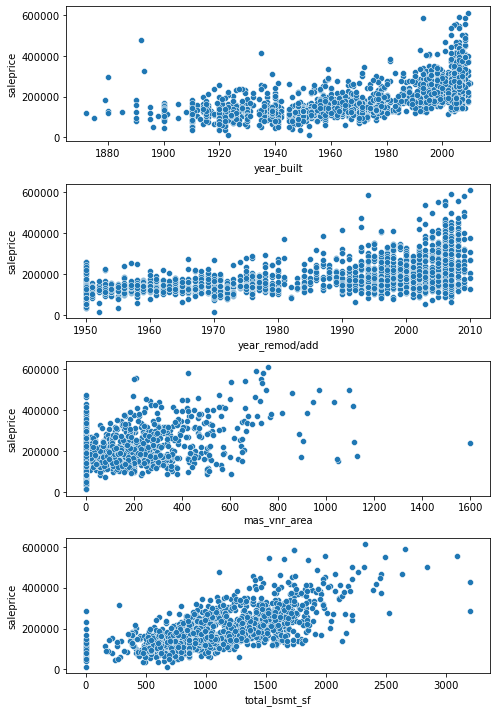

In [38]:
#Visualising the first 4 Positively Correlated Variables 'year_built', 'year_remod/add', 
#'mas_vnr_area', and 'total_bsmt_sf'
correlation_plotter(['year_built', 'year_remod/add', 'mas_vnr_area', 'total_bsmt_sf'])

None of the distributions look normal. These variables may need to be transformed for prediction purposes.

1. year_built seems to simply have more houses built as the years go by, with a clear gap in the early 1940s, most likely because of the two World Wars. Prices increasing could be due to inflation.


2. year_remod/add doesn't seem to have much of a positive correlation: It just seems to have more values after 1990 that sell better. There could simply be a lack of information before 1990. There are many houses that have a value of 1950 though, so many that is a default value that needs to be cleaned.


3. mas_vnr_area shows a positive correlation, although there is be an outlier with 1600 square feet of veneer area that didn't sell for a high price. This may need to be cleaned, but because it's a possible value, I might leave it in the dataset.


4. total_bsmt_sf shows a clear positive correlation, although there are more outliers when houses have more than 2500 square feet of basement space.


5. There are many '0' values in mas_vnr_area and total_bsmt_sf, with mas_vnr_area having a count of 1250 '0' values! It could just mean they don't have any veneers, or have any basements, so they are genuine data.

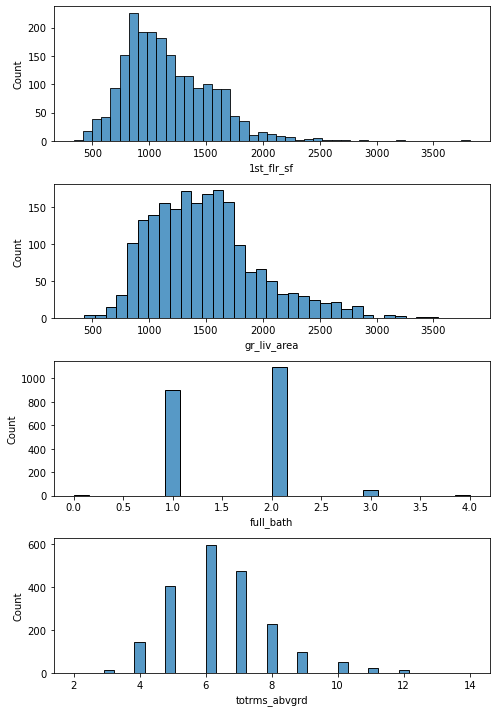

In [39]:
distribution_plotter(['1st_flr_sf', 'gr_liv_area', 'full_bath', 'totrms_abvgrd'])

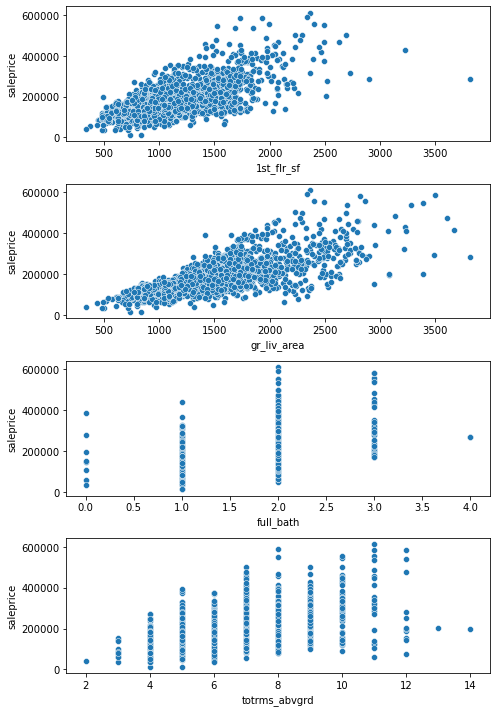

In [40]:
correlation_plotter(['1st_flr_sf', 'gr_liv_area', 'full_bath', 'totrms_abvgrd'])

The distributions look normal, with right skews for 1st_flr_sf and gr_liv_area. Like price, these values can become larger, but none of them can go below 0.

There seems to be a positive correlation between all of the variables and saleprice. There is a potential outlier for 1st_flr_sf, with one house having more than 3500 square feet, but selling for below 400,000.

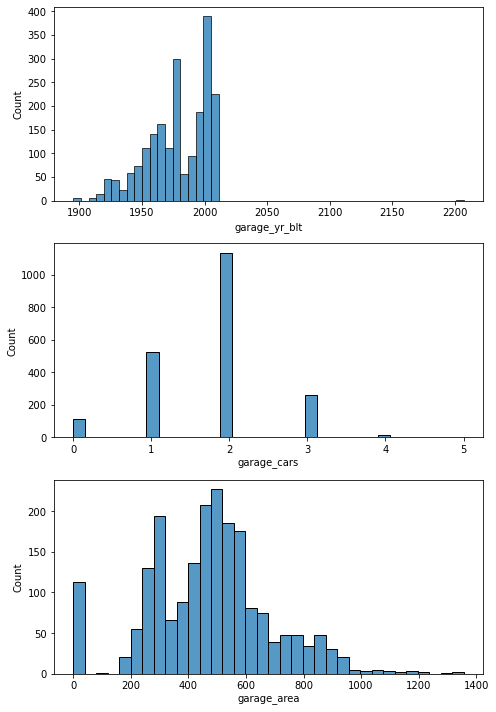

In [41]:
distribution_plotter(['garage_yr_blt', 'garage_cars', 'garage_area'])

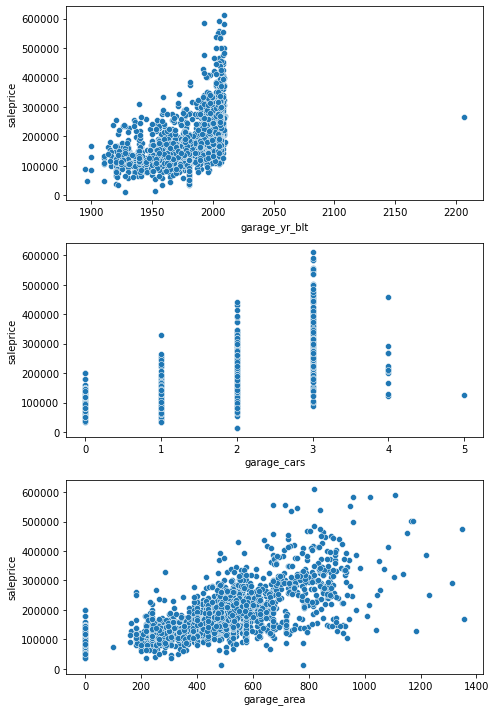

In [42]:
correlation_plotter(['garage_yr_blt', 'garage_cars', 'garage_area'])

garage_cars and garage_area are drawn from a normal distribution. garage_yr_built is not normal, which is to be expected given the other distributions we have seen above. More houses were built.

garage_yr_built has an outlier with a house being built 200 years in the future! I'll correct this below

These 3 plots all have a positive correlation with saleprice. Some houses seem to have 0 garage area, which means they have no garages.

In [43]:
#Correcting garage_yr_built mistake
ames_df[ames_df['garage_yr_blt']>2200]['garage_yr_blt']

1698    2207.0
Name: garage_yr_blt, dtype: float64

In [44]:
#Replacing the value with 2007
ames_df.loc[1698, 'garage_yr_blt'] = 2007

In [45]:
#Checking the value again
ames_df.loc[1698, 'garage_yr_blt']

2007.0

### 4.3: Visualising correlations between predictors

From my exploration above, I found that these variables have >0.75 correlation between them.

|**Index**|**Variable 1**|**Variable 2**|
|---|---|---|
|1|garage_yr_blt|year_built|
|2|totrms_abvgrd|gr_liv_area|
|3|garage_area|garage_cars|
|4|1st_flr_sf|total_bsmt_sf|


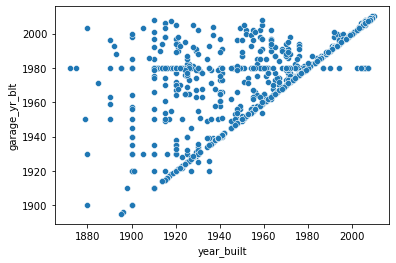

In [46]:
#Visualising row 1, year_built against garage_yr_blt
sns.scatterplot(x=ames_df['year_built'], y = ames_df['garage_yr_blt']);

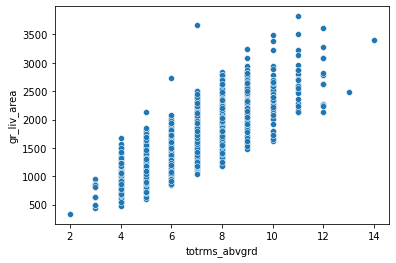

In [47]:
#Visualising row 2, totrms_abvgrd against gr_liv_area
sns.scatterplot(x=ames_df['totrms_abvgrd'], y = ames_df['gr_liv_area']);

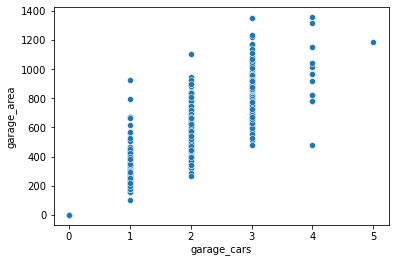

In [48]:
#Visualising row 3, garage_cars against garage_area
sns.scatterplot(x=ames_df['garage_cars'], y = ames_df['garage_area']);

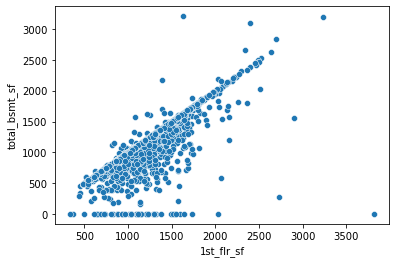

In [49]:
#Visualising row 4, 1st_flr_sf against total_bsmt_sf
sns.scatterplot(x=ames_df['1st_flr_sf'], y = ames_df['total_bsmt_sf']);

All of the variables are positively correlated with their counterpart variables.

Row 1: The year the house was built is highly correlated to the year the garage was built. That makes sense because when most houses are built, the garage will be built with them. Garages can be built later than when the house was built, which explains the many data points lying above the x=y line.

Row 2: Total rooms above grade is highly correlated with the Above ground living area. The more living area you have, the more rooms you can build.

Row 3: These two variables say the same thing in different units: The total garage space in terms of car space and in terms of square feet.

Row 4: The first floor and basement floor areas are highly correlated. Assuming first floor is the equivalent of Singapore's Ground floor, this makes sense because it is sensible to build a similarly sized basement to maximise your living area. In some cases, it's possible to have a large first floor and no basement, or have a large basement and less 1st floor area.

While dropping these variables may seem like a good idea, I will leave them up first to make cleaning easier. This co-linearity will have to be taken into account when feature selection happens.

### 4.4: Can I answer the proposed data question with this dataset?

Yes, the response variable is normal with some skew, while there are valuable features that are positively correlated to it. There are some predictor variables that are correlated with each other, which goes against the Independence assumption for Linear Regression. However, as we now know what they are, it is easy to factor that in to feature selection.

Missing values have also been imputed.

## Section 5: Dummying categorical variables

### 5.1: Transforming ordinal variables

Some of the features are nominal and ordinal. I will have to turn them into numerical values so that they can be used for Linear Regression. There are 23 ordinal and 23 nominal variables. They are shown below, going left to right from best to worst.

##### Ordinal features

**overall_cond**, **overall_qual** are ordinal and already numerical

**exter_qual, exter_cond, bsmt_qual, bsmt_cond, heatingqc, kitchenqual, garage_qual, garage_cond, 
pool_qc (removed)** uses 'Ex', 'Gd', 'TA', 'Fa', and 'Po'

**fireplacequ** uses 'Ex', 'Gd', 'TA', 'Fa', 'Po', and 'No_fp'

**bsmt_exposure** uses 'Gd', 'Av', 'Mn', 'No'

**bsmtfin_type_1, bsmtfintype_2** uses 'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf'

**electrical** uses 'SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'

**garage_finish** uses 'Fin', 'RFn', 'Unf'

**functional** uses 'Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'

**paved_drive** uses 'Y', 'P', and 'N'

**lot_shape** uses 'Reg', 'IR1', 'IR2', 'IR3'

**utilities** uses 'AllPub', 'NoSewr', 'NoSeWa', 'ELO'

**land_slope** uses 'Gtl', 'Mod', 'Sev'

**fence** uses 'GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'Nofence'

In [50]:
#OrdinalEncoder needs a list of the rankings, one for each variable. quality_list is shared by 8 variables.

quality_list = ['Po', 'Fa', 'TA', 'Gd', 'Ex']

fireplace_list=['No_fp', 'Po', 'Fa', 'TA', 'Gd', 'Ex']

bsmt_exposure_list = ['No', 'Mn', 'Av', 'Gd']

bsmtfin_type_list = ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']

electrical_list = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']

garage_list = ['Unf', 'RFn', 'Fin']

functional_list = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']

paved_drive_list = ['N', 'P', 'Y']

lot_shape_list = ['IR3', 'IR2', 'IR1', 'Reg']

utilities_list = ['ELO', 'NoSeWa', 'NoSewr', 'AllPub']

land_slope_list = ['Sev', 'Mod', 'Gtl']

fence_list = ['Nofence', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']

In [51]:
#This cell simply instantiates the OrdinalEncoder class with the lists loaded in, ready to be applied to their
#respective columns
ames_oe = OrdinalEncoder(categories=[quality_list, quality_list, quality_list, quality_list, quality_list, quality_list
                                    , quality_list, quality_list, fireplace_list, bsmt_exposure_list,
                                    bsmtfin_type_list, bsmtfin_type_list, electrical_list, garage_list, 
                                    functional_list, paved_drive_list, lot_shape_list, utilities_list,
                                    land_slope_list, fence_list])

In [52]:
ordinal_list = ['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'heating_qc',
                     'kitchen_qual', 'garage_qual', 'garage_cond', 'fireplace_qu', 'bsmt_exposure',
                     'bsmtfin_type_1', 'bsmtfin_type_2', 'electrical', 'garage_finish',
                     'functional', 'paved_drive', 'lot_shape', 'utilities',
                     'land_slope', 'fence']

In [53]:
#Like other classes in sklearn, OrdinalEncoder needs a fit and transform. This cell applies the lists to their
#respective column names
ames_oe.fit(ames_df[ordinal_list])

OrdinalEncoder(categories=[['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['No_fp', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['No', 'Mn', 'Av', 'Gd'],
                           ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                           ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                           ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'],
                           ['Unf', 'RFn', 'Fin'],
                           ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1',
                            'Typ'],
                          

In [54]:
#Assigning the transformed columns to their respective column names
ames_df[ordinal_list] = ames_oe.transform(ames_df[ordinal_list])
ames_test[ordinal_list] = ames_oe.transform(ames_test[ordinal_list])

In [55]:
ames_df.shape

(2049, 78)

In [56]:
ames_test.shape

(879, 77)

### 5.2: Dummying nominal variables

##### Nominal variables

The nominal values will be transformed automatically, so I will simply list them out for later use.

**ms_subclass(already a number), ms_zoning, street, alley, land_contour, lot_config, neighborhood, condition_1, condition_2**

**bldg_type, house_style, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, foundation, heating**

**central_air, garage_type, misc_feature(dropped), sale_type, sale_condition(missing in this dataset)**

In [57]:
nominal_columns = ['ms_zoning', 'street', 'alley', 'land_contour', 
                   'lot_config', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 
                   'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 
                   'mas_vnr_type', 'foundation', 'heating', 'central_air', 'garage_type', 'sale_type']

In [58]:
ames_test['roof_matl'].unique()

array(['CompShg', 'Metal', 'WdShake', 'Tar&Grv', 'WdShngl', 'Roll'],
      dtype=object)

In [59]:
ames_df = pd.get_dummies(ames_df, columns=nominal_columns, drop_first=True)

In [60]:
ames_test = pd.get_dummies(ames_test, columns=nominal_columns, drop_first=True)

In [61]:
ames_df.shape

(2049, 190)

In [62]:
ames_test.shape

(879, 183)

The two shapes aren't the same because some columns are missing from ames_test! Some of the values in the ames_df training set did not show up in the ames_test dataset!

In [63]:
list(set(ames_df.columns).symmetric_difference(set(ames_test.columns)))

['heating_Wall',
 'roof_matl_Metal',
 'exterior_1st_CBlock',
 'exterior_2nd_Stone',
 'roof_matl_Membran',
 'heating_GasA',
 'neighborhood_GrnHill',
 'exterior_1st_ImStucc',
 'condition_2_RRAn',
 'mas_vnr_type_CBlock',
 'condition_2_RRAe',
 'saleprice',
 'exterior_1st_PreCast',
 'exterior_2nd_Other',
 'heating_OthW',
 'condition_2_Feedr',
 'condition_2_RRNn',
 'ms_zoning_C (all)',
 'roof_matl_Roll',
 'exterior_2nd_PreCast',
 'sale_type_VWD',
 'neighborhood_Landmrk',
 'exterior_1st_Stone']

Because the files need to be the same size for the fit_transform procedures to work later on, I will remove the columns.

In [64]:
#Saving the list for later, to remove them
features_to_remove = list(set(ames_df.columns).symmetric_difference(ames_test.columns))

In [65]:
for feature in features_to_remove:
    if (feature != 'saleprice') and (feature in ames_df.columns):
        del ames_df[feature]

In [66]:
list(set(ames_df.columns).symmetric_difference(set(ames_test.columns)))

['roof_matl_Metal',
 'heating_GasA',
 'mas_vnr_type_CBlock',
 'saleprice',
 'exterior_1st_PreCast',
 'exterior_2nd_Other',
 'roof_matl_Roll',
 'exterior_2nd_PreCast',
 'sale_type_VWD']

In [67]:
features_to_remove = list(set(ames_df.columns).symmetric_difference(ames_test.columns))

In [68]:
for feature in features_to_remove:
    if (feature != 'saleprice') and (feature in ames_test.columns):
        del ames_test[feature]

In [69]:
ames_df.shape

(2049, 176)

In [70]:
ames_test.shape

(879, 175)

In [71]:
ames_df.to_csv('../datasets/ames_df_explored.csv')

In [72]:
ames_test.to_csv('../datasets/ames_test_explored.csv')